1- Objetivo del EDA

El objetivo de este análisis exploratorio de datos (EDA) es investigar y comprender la estructura, calidad y relaciones de los datos en el dataset de películas. Esto incluye identificar valores nulos, duplicados y outliers, analizar la distribución de las variables, y descubrir correlaciones entre ellas. Además, se busca extraer patrones o tendencias, como palabras frecuentes en los títulos, que puedan ser útiles para mejorar el sistema de recomendación. Este análisis nos permitirá detectar problemas potenciales, tomar decisiones de limpieza y transformación de datos, y obtener información clave para el desarrollo de modelos de machine learning y recomendaciones más efectivas.

Estructura del EDA
Introducción: Objetivo del EDA

Explicación de los objetivos y la importancia del análisis exploratorio en este dataset. Incluye un breve párrafo mencionando el propósito de investigar la estructura y calidad de los datos de películas para optimizar el sistema de recomendación y entender patrones relevantes.
Carga de Datos y Configuración

Importación de Librerías: pandas, numpy, matplotlib, seaborn, wordcloud.
Carga del Dataset: Lee el archivo dataclean.csv y muestra las primeras filas con .head() para tener una vista preliminar.
Información General del Dataset: Usa .info() y .describe() para tener una visión inicial de las columnas, tipos de datos y estadísticas generales.
Chequeo de Nulos, Duplicados y Faltantes

Nulos: Calcula la cantidad de valores nulos por columna y el porcentaje. Presta atención a tagline, collection_name, company_name y otras columnas con valores nulos significativos.
Duplicados: Verifica si existen valores duplicados en el dataset y toma una decisión sobre qué hacer con ellos.
Valores Faltantes o Cero: Busca valores atípicos o inconsistentes en variables numéricas clave como budget y revenue (por ejemplo, filas donde el valor es 0).
Tipos de Datos y Transformaciones

Revisión de los tipos de datos para confirmar que están adecuados.
Convierte release_date en tipo datetime y verifica si otras columnas como id o budget requieren ajustes adicionales.
Análisis Estadístico de Variables Numéricas

Distribuciones: Usa histogramas para ver la distribución de variables como budget, revenue, popularity, runtime, vote_average, vote_count, y return.
Descripción Estadística: Realiza un análisis descriptivo para estas variables, destacando valores como media, mediana, máximo y mínimo.
Análisis de Correlación

Genera una matriz de correlación para observar las relaciones entre las variables numéricas.
Usa un heatmap para visualizar la matriz y destacar correlaciones fuertes (por ejemplo, entre budget y revenue).
Gráficos de Dispersión: Examina relaciones específicas como budget vs. revenue y popularity vs. vote_average.
Detección de Outliers

Realiza un análisis de outliers para variables numéricas como budget, revenue y runtime usando boxplots.
Comenta sobre la presencia de valores extremos y si podrían tener algún impacto en el análisis.
Análisis de Variables Categóricas

Explora variables como original_language, status, country_name, collection_name, y company_name.
Usa gráficos de barras para visualizar la frecuencia de estas categorías y comenta sobre su distribución.
Nube de Palabras: Títulos y Descripciones

Crea nubes de palabras para las columnas title y overview, si deseas observar los términos más frecuentes en títulos y descripciones.
Comenta si los resultados pueden dar información valiosa para mejorar el sistema de recomendación.
Conclusiones y Siguientes Pasos

Conclusiones Principales: Resumen de patrones, insights y hallazgos, como las correlaciones fuertes, la presencia de outliers y las distribuciones observadas.
Acciones Siguientes: Menciona decisiones para mejorar la calidad de los datos (como eliminar nulos o transformar variables) y cómo los hallazgos apoyan el objetivo del proyecto (por ejemplo, términos frecuentes en títulos que ayudan al sistema de recomendación).


-

2. Carga de Datos y Configuración

In [24]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Cargar el dataset
data = pd.read_csv("Movies/dataclean.csv")  # Reemplaza con la ruta de tu archivo

# Mostrar las primeras filas y la información general
data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93917 entries, 0 to 93916
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   budget                    93917 non-null  int64  
 1   id                        93917 non-null  int64  
 2   original_language         93900 non-null  object 
 3   overview                  92601 non-null  object 
 4   popularity                93917 non-null  float64
 5   release_date              93917 non-null  object 
 6   revenue                   93917 non-null  float64
 7   runtime                   93596 non-null  float64
 8   status                    93793 non-null  object 
 9   tagline                   46995 non-null  object 
 10  title                     93917 non-null  object 
 11  vote_average              93917 non-null  float64
 12  vote_count                93917 non-null  float64
 13  collection_id             11216 non-null  float64
 14  collec

Análisis General del Dataset
Tamaño del Dataset:

Este dataset contiene 93,917 filas y 42 columnas. Esto indica que tienes una gran cantidad de datos, lo cual es positivo para realizar un análisis detallado y entrenar un modelo de recomendación sólido.
- Tipos de Datos:

int64: 3 columnas (budget, id, release_year)

float64: 14 columnas, principalmente relacionadas con métricas numéricas como popularity, revenue, runtime, vote_average, vote_count, return, entre otras.

object: 24 columnas, muchas de las cuales contienen texto, como original_language, overview, status, title, collection_name, genres_name, y company_name. Estas son importantes para entender información descriptiva sobre cada película.

bool: 1 columna (id_comparison), la cual parece ser un indicador binario.

Observación: Dado que la columna release_date es de tipo object, puede ser conveniente transformarla en formato de fecha para facilitar el análisis de datos temporales.

- Columnas con Valores Nulos:

Varias columnas tienen valores nulos significativos, como tagline, collection_name, collection_poster_path, collection_backdrop_path, cast_profile_path, crew_profile_path, y genres_0 (esta última con el 100% de valores nulos).

Las columnas original_language, overview, runtime, status, genres_name, company_name, y language_name también tienen algunos valores nulos, pero en menor cantidad.

Interpretación: La cantidad de valores nulos en estas columnas sugiere que no toda la información está completa para cada película. Será necesario decidir si se imputan estos valores (rellenarlos con datos), si se dejan como están o si se eliminan algunas columnas como genres_0, que tiene datos completamente nulos.

- Columnas Numéricas Principales:

budget y revenue son importantes para calcular el rendimiento financiero (return) de cada película.
popularity y vote_average, junto con vote_count, son útiles para evaluar la aceptación del público.
runtime ofrece la duración de la película y puede usarse para analizar el impacto de la duración en la popularidad.
- Columnas de Identificación:

id: Identificador único para cada película.
collection_id y company_id: Identificadores para colecciones y compañías. Estos pueden ser útiles para análisis específicos si se desea agrupar películas por colección o compañía productora.
- Columnas Descriptivas y Categóricas:

original_language, country_name, status y collection_name contienen información categórica que se puede usar para agrupar películas o entender distribuciones (por ejemplo, popularidad por idioma o país).
genres_name y company_name permiten un análisis del género de cada película y la compañía productora.
cast_name y crew_name ofrecen información sobre el elenco y el equipo, lo cual es útil para consultas específicas y análisis sobre actores o directores.
Paso a Seguir en el EDA
Basado en esta estructura, los próximos pasos en el EDA serían:

Chequeo y tratamiento de valores nulos en columnas con una alta proporción de datos faltantes.
Transformación de tipos de datos, como convertir release_date a formato datetime.
Análisis de distribuciones para las columnas numéricas clave.
Exploración de relaciones entre columnas numéricas y categóricas (por ejemplo, budget y revenue).

3. Chequeo de Nulos, Duplicados y Faltantes

In [25]:
# Chequeo de valores nulos y porcentaje de nulos
nulos = data.isnull().sum()
nulos_porcentaje = (nulos / len(data)) * 100
nulos_df = pd.DataFrame({"Nulos": nulos, "Porcentaje": nulos_porcentaje})
print(nulos_df[nulos_df['Nulos'] > 0])

# Chequeo de valores duplicados
duplicados = data.duplicated().sum()
print(f"Valores duplicados: {duplicados}")

# Chequeo de valores cero en columnas relevantes
print("Valores con presupuesto cero:", data[data['budget'] == 0].shape[0])
print("Valores con revenue cero:", data[data['revenue'] == 0].shape[0])


                          Nulos  Porcentaje
original_language            17    0.018101
overview                   1316    1.401237
runtime                     321    0.341791
status                      124    0.132031
tagline                   46922   49.961136
collection_id             82701   88.057540
collection_name           82701   88.057540
collection_poster_path    83897   89.331005
collection_backdrop_path  85525   91.064451
genres_name                2385    2.539476
genres_0                  93917  100.000000
company_name               4557    4.852157
company_id                 4557    4.852157
country_code                  7    0.007453
language_name               798    0.849686
cast_id                    3051    3.248613
cast_character             4185    4.456062
cast_credit_id             3051    3.248613
cast_gender                3051    3.248613
cast_name                  3051    3.248613
cast_order                 3051    3.248613
cast_profile_path         28814 

Para mejorar la calidad del dataset y asegurar que la información sea lo más completa posible, revisé las columnas que tienen valores nulos, duplicados y valores faltantes. A continuación, detallo los puntos clave y mis decisiones al respecto:

Análisis de Valores Nulos
Columnas con Alto Porcentaje de Nulos

tagline (49.96% de nulos): Esta columna contiene frases promocionales o eslóganes de las películas. Dado que casi la mitad de las entradas están vacías, no es esencial para mi análisis y puedo considerar dejarla con valores nulos o incluso eliminarla si no aporta valor significativo.
collection_id, collection_name, collection_poster_path, collection_backdrop_path (88-91% de nulos): Estas columnas representan la colección a la que pertenece una película, como en casos de franquicias o series de películas. La cantidad de valores nulos sugiere que solo algunas películas forman parte de una colección, así que:
Podría dejarlas como están y centrarme en películas con información completa de colección, o
Eliminarlas si el análisis por colección no resulta relevante, considerando el alto porcentaje de nulos.
genres_0 (100% de nulos): Dado que esta columna no tiene valores, la voy a eliminar del dataset ya que no aporta información útil.
cast_profile_path y crew_profile_path (30.68% y 77.42% de nulos): Estas columnas contienen rutas de imágenes de perfil de los actores y el equipo. Decidiré eliminarlas si las imágenes de perfil no resultan importantes para el análisis o el sistema de recomendación.
Columnas con Porcentaje Bajo a Moderado de Nulos

overview (1.40% de nulos): Representa una sinopsis de la película. Dado que las descripciones son útiles para el análisis de texto (como en nubes de palabras), podría llenar los valores nulos con un texto genérico como "Sin descripción" o dejar nulos estos registros si no afectan al análisis.
runtime (0.34% de nulos): Indica la duración de la película. Estos valores nulos se pueden imputar con la media o mediana de las duraciones de películas.
status (0.13% de nulos): Describe el estado de la película (por ejemplo, "Released" o "Post Production"). Para los nulos, podría usar un valor genérico como "Unknown" o dejarlos sin cambios si no afectan.
company_name y company_id (4.85% de nulos): Identifican la compañía productora, lo cual puede ser relevante para entender la distribución de películas por estudio. Podría completar los valores nulos con "Unknown" si decidiera hacer un análisis por compañía.
cast_* y crew_* (3.25% de nulos): Estas columnas proporcionan información sobre el elenco y el equipo. Aunque tienen un pequeño porcentaje de nulos, podría dejarlos como están ya que los registros incompletos no deberían afectar gravemente al sistema de recomendación.
Valores Cero en Columnas Numéricas Importantes

budget y revenue presentan una gran cantidad de valores cero (71,819 en budget y 75,214 en revenue), lo cual probablemente indica datos faltantes que no se registraron. Estos valores cero podrían:
Tratarse como valores faltantes y analizar una imputación usando la mediana para películas similares en budget y revenue.
Impacto: La ausencia de valores en estas columnas es significativa, ya que afectará el análisis financiero y el cálculo del rendimiento (return).
Valores Duplicados
Encontré 13 filas duplicadas en el dataset. Decido eliminar estos duplicados para evitar redundancia en el análisis, ya que cada registro debería ser único y representativo de una sola película

4. Tipos de Datos y Transformaciones

In [26]:
# Verificación de tipos de datos
print(data.dtypes)

# Conversión de la columna 'release_date' a tipo datetime
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Si alguna otra columna necesita transformación, ajusta aquí


budget                        int64
id                            int64
original_language            object
overview                     object
popularity                  float64
release_date                 object
revenue                     float64
runtime                     float64
status                       object
tagline                      object
title                        object
vote_average                float64
vote_count                  float64
collection_id               float64
collection_name              object
collection_poster_path       object
collection_backdrop_path     object
genres_name                  object
genres_0                    float64
company_name                 object
company_id                  float64
country_code                 object
country_name                 object
language_code                object
language_name                object
release_year                  int64
return                      float64
cast_id                     

Análisis de Tipos de Datos
Columnas Numéricas Enteras (int64)

budget, id, release_year: Estas columnas tienen el tipo de dato correcto como enteros (int64), por lo que no necesitan transformación adicional.
budget y release_year: Estas son importantes para el análisis financiero y temporal, y tienen valores enteros que están en el formato adecuado.
Columnas Numéricas Decimales (float64)

Columnas como popularity, revenue, runtime, vote_average, vote_count, return y company_id están correctamente en formato float64, lo cual permite hacer análisis estadísticos y cálculos precisos.
return: Esta columna es clave para analizar el rendimiento financiero de las películas y, al estar en formato float64, puede usarse para calcular promedios y otros análisis sin requerir cambios.
Columnas de Texto (object)

original_language, overview, status, tagline, title, genres_name, collection_name, y company_name contienen texto descriptivo o categórico, y están correctamente en formato object.
release_date: Esta columna está en formato object, pero representa una fecha. Para facilitar el análisis de datos temporales, voy a convertirla en tipo datetime. Esta transformación permitirá extraer fácilmente el año, mes o día si resulta necesario.

cast_id, cast_gender, cast_order, crew_id, y crew_gender: Estas columnas contienen valores de identificación o información categórica, pero en formato float64. A pesar de que no necesitan transformarse, es útil recordar que representan categorías o identificadores.
collection_id y company_id: Aunque están en formato float64, representan identificadores únicos, por lo que puedo dejarlas como están.
Columnas Booleanas

id_comparison: Esta columna tiene un formato booleano (bool), que es el correcto para representar valores binarios (True/False). No necesita transformación.
Decisiones de Transformación
Conversión de release_date: Convertí release_date al formato datetime para simplificar el análisis temporal y asegurar que sea posible extraer componentes específicos (año, mes, día).
Columnas Categóricas con Formato Numérico: Aunque algunas columnas como cast_gender y crew_gender son numéricas, los valores representan categorías (por ejemplo, género de los actores y del equipo). Esto es importante para saber interpretarlos correctamente, aunque no se requiere una transformación en esta fase.

5. Análisis Estadístico de Variables Numéricas

             budget             id    popularity  \
count  9.391700e+04   93917.000000  93917.000000   
mean   5.973023e+06   96101.435885      3.520307   
min    0.000000e+00       2.000000      0.000000   
25%    0.000000e+00   20863.000000      0.520118   
50%    0.000000e+00   49183.000000      1.466097   
75%    0.000000e+00  125077.000000      4.996071   
max    3.800000e+08  469172.000000    547.488298   
std    2.128707e+07  108062.571504      7.235963   

                        release_date       revenue       runtime  \
count                          93917  9.391700e+04  93596.000000   
mean   1992-06-15 18:36:40.777282048  1.591355e+07     96.810526   
min              1874-12-09 00:00:00  0.000000e+00      0.000000   
25%              1979-08-10 00:00:00  0.000000e+00     87.000000   
50%              2001-03-07 00:00:00  0.000000e+00     96.000000   
75%              2010-05-17 00:00:00  0.000000e+00    108.000000   
max              2020-12-16 00:00:00  2.787965e+09   12

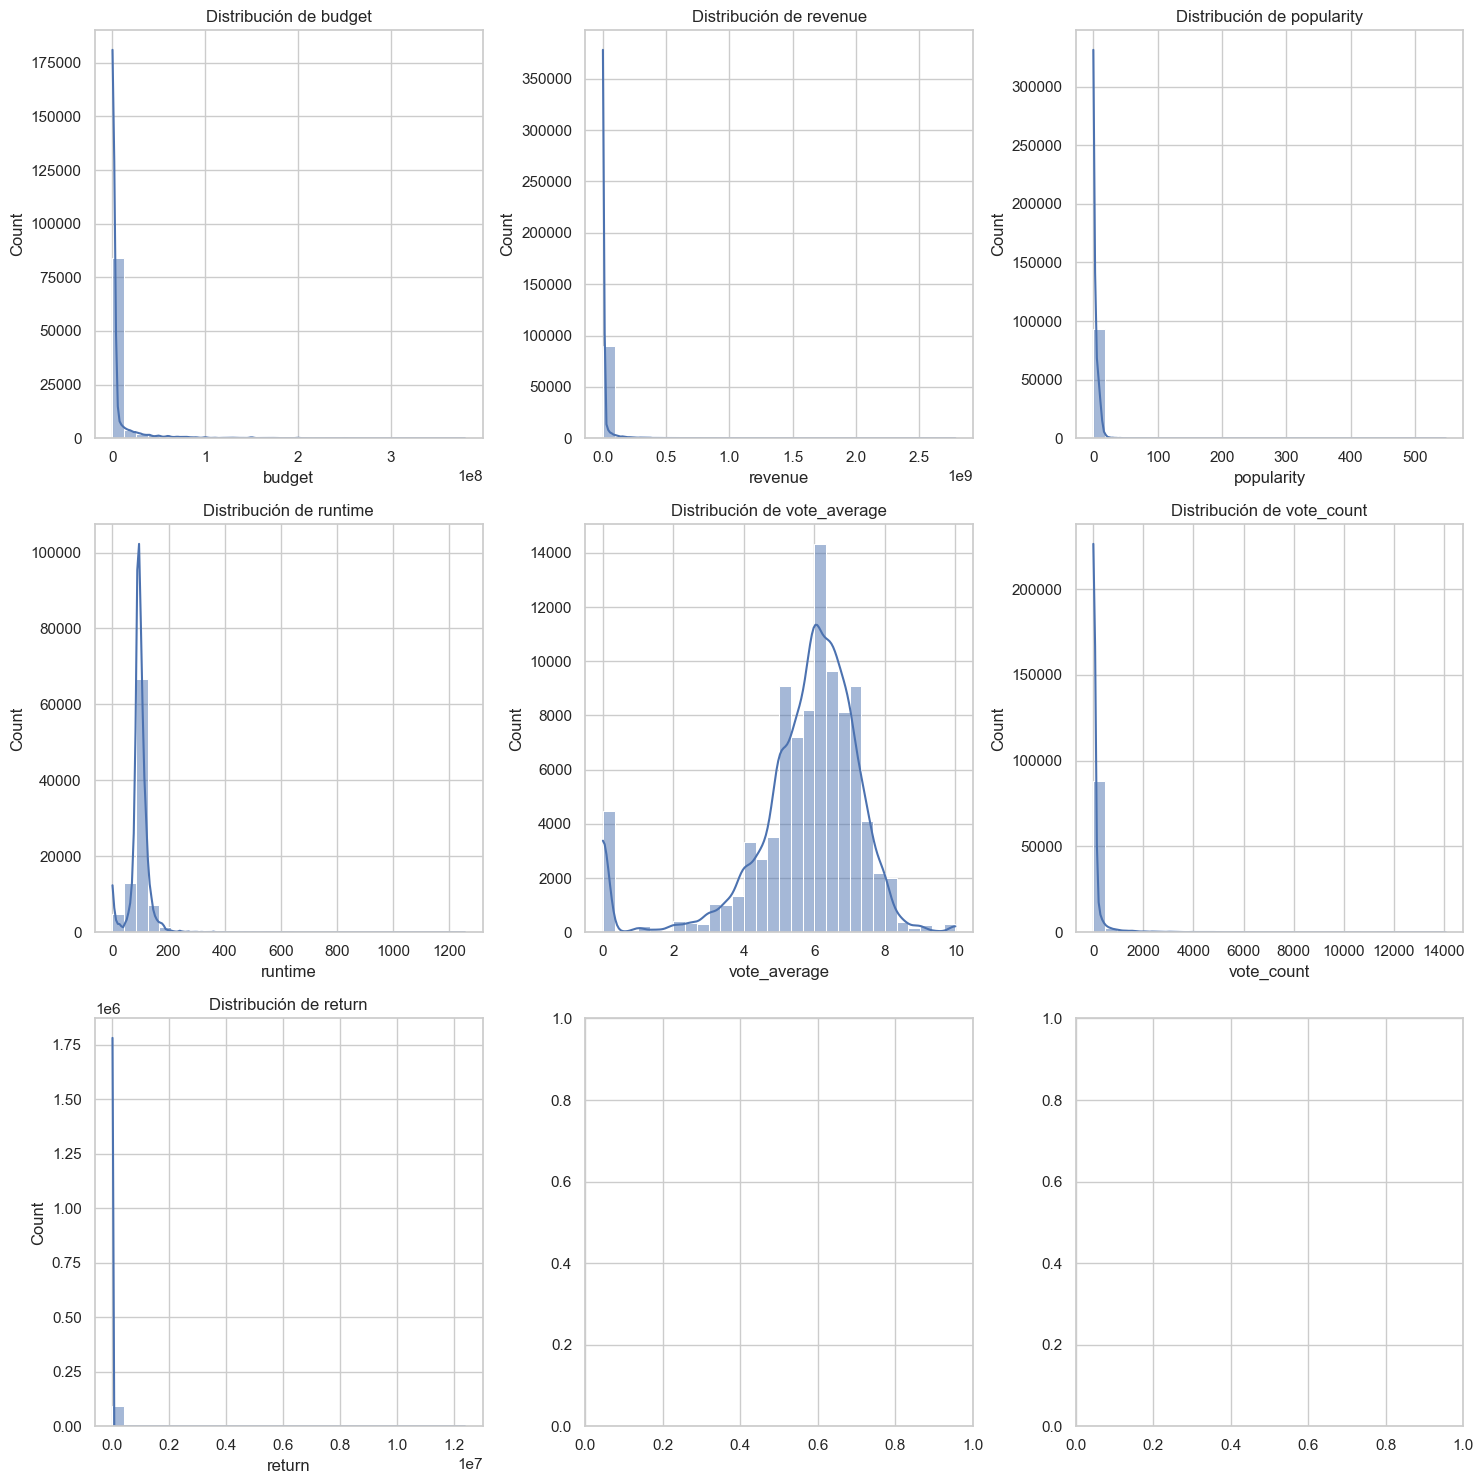

In [32]:
# Descripción estadística de las variables numéricas
print(data.describe())

# Histogramas de las variables numéricas clave
numeric_columns = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count', 'return']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
for i, col in enumerate(numeric_columns):
    sns.histplot(data[col], bins=30, kde=True, ax=axes[i//3, i%3]).set_title(f"Distribución de {col}")
plt.tight_layout()
plt.show()


Observaciones Generales de las Columnas Numéricas
budget (Presupuesto):

Promedio: $5,973,023, con una gran variabilidad (desviación estándar de $21,287,070).
Valores Extremos: Oscila entre $0 y $380,000,000. La cantidad significativa de presupuestos en $0 sugiere datos faltantes o no registrados.
Acción: Considerar el tratamiento de valores cero como valores faltantes, para decidir si es viable una imputación o excluirlos en ciertos análisis financieros.
popularity (Popularidad):

Rango: Desde 0 hasta 547.5, con una media de 3.52 y una desviación estándar de 7.24. Esto indica que existen valores de popularidad extremadamente altos, mientras que la mayoría de las películas tienen popularidades mucho más bajas.
Acción: Verificar cómo se distribuye esta variable y considerar la posibilidad de aplicar técnicas de normalización si es necesario para análisis de similitud o recomendación.
revenue (Ingresos):

Promedio: $15,913,550, con una desviación estándar alta de $79,397,590, lo que muestra una gran variabilidad en las recaudaciones de las películas.
Valores Extremos: Varía entre $0 y $2,787,965,000, con muchos valores en $0, indicando que gran parte de las películas carecen de datos de ingresos.
Acción: Tratar los valores cero como datos faltantes, especialmente si se va a calcular el retorno sobre la inversión (return).
runtime (Duración):

Promedio: 96.8 minutos, con un mínimo de 0 y un máximo de 1,256 minutos. La duración de 0 sugiere valores atípicos o registros incorrectos.
Acción: Imputar valores nulos o atípicos (como 0) con la mediana o el promedio de runtime según el tipo de película.
vote_average (Puntuación Promedio) y vote_count (Cantidad de Votos):

Puntuación Media: 5.71, con una variabilidad moderada (desviación estándar de 1.74). La puntuación promedio puede ser útil para el sistema de recomendación.
Cantidad de Votos: Rango amplio, desde 0 hasta 14,075 votos. Esto podría correlacionarse con la popularidad y permitir identificar películas más conocidas.
Acción: Analizar si el número de votos y la popularidad están correlacionados y evaluar cómo afecta la puntuación promedio a la percepción de cada película.
release_year (Año de Estreno):

Rango: Desde 1874 hasta 2020. Esto abarca un período amplio, lo cual puede permitir análisis por época o décadas.
Acción: Dividir las películas en períodos de tiempo (décadas, por ejemplo) para analizar tendencias en popularidad, puntuación y otros factores a lo largo de los años.
return (Retorno de Inversión):

Rango: El valor promedio es 862.86, con muchos valores en 0, lo cual podría estar relacionado con presupuestos e ingresos no reportados. Algunos valores de retorno son excepcionalmente altos, lo que sugiere que unas pocas películas han tenido un éxito financiero extraordinario.
Acción: Tratar los valores cero como nulos en los casos donde budget o revenue también son cero, y enfocarse en analizar aquellas películas con datos completos para un análisis financiero más preciso.
cast_id, crew_id, cast_order y crew_gender:

Aunque estas columnas son numéricas, representan información categórica y de identificación, por lo que el análisis estadístico no es relevante.
Acción: Utilizarlas solo en los contextos donde los IDs específicos del elenco y el equipo sean necesarios.
Conclusiones del Análisis Estadístico
Este análisis me permitió identificar columnas que requieren un tratamiento adicional debido a valores nulos, cero o valores extremos, especialmente en budget, revenue, y runtime. Además, existen indicadores de tendencias, como el promedio de vote_average y la distribución de release_year, que pueden ser útiles para segmentar y comprender mejor el dataset.

En el siguiente paso, analizaré la correlación entre estas variables, lo que me ayudará a identificar relaciones significativas entre popularidad, puntuación, presupuesto y otros factores que puedan influir en el sistema de recomendación.

6. Análisis de Correlación

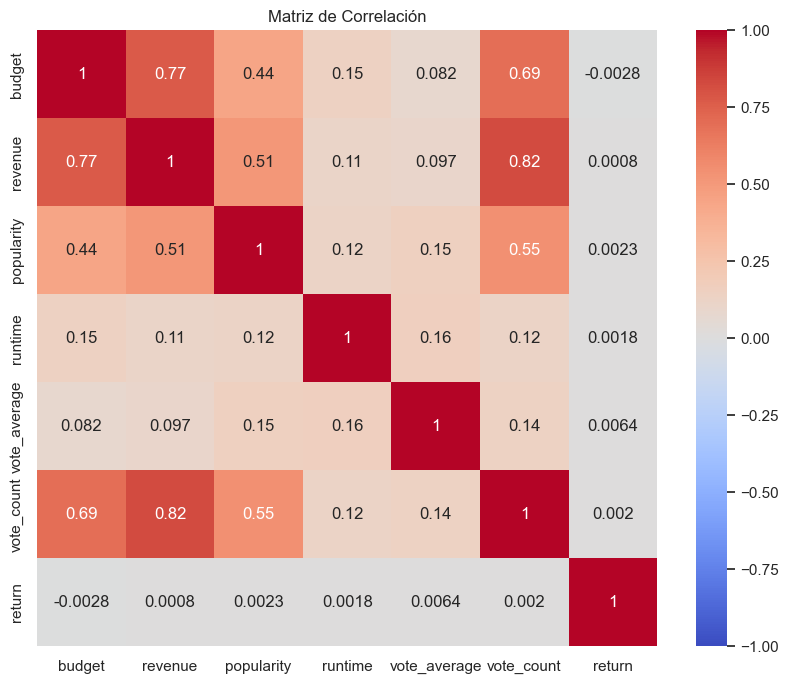

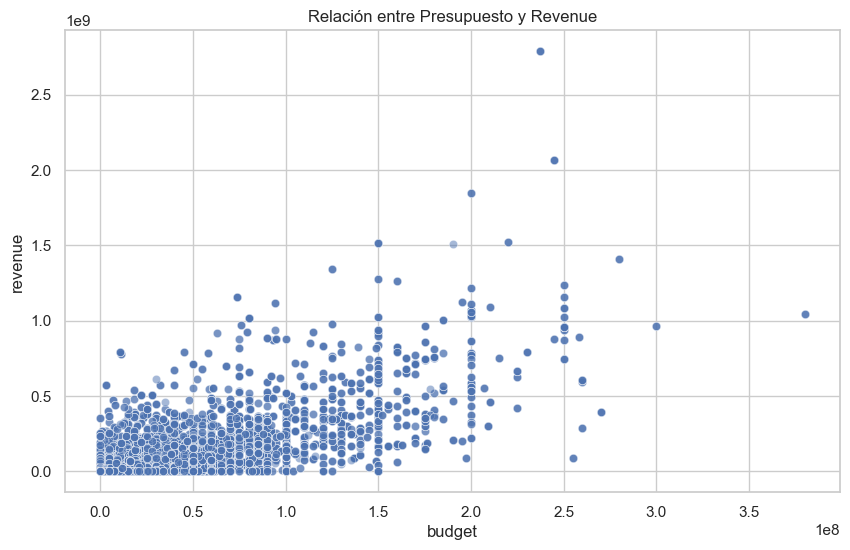

In [28]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

# Ejemplo de gráfico de dispersión entre presupuesto y revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=data, alpha=0.5)
plt.title("Relación entre Presupuesto y Revenue")
plt.show()


Análisis de Correlación (Paso 6)
Para entender mejor la relación entre las variables numéricas de nuestro dataset, he generado dos visualizaciones clave: una matriz de correlación y un diagrama de dispersión de la relación entre budget y revenue.

Matriz de Correlación:

La matriz de correlación muestra la relación entre diferentes variables numéricas en el dataset. Los valores van de -1 a 1, donde valores cercanos a 1 indican una correlación positiva fuerte, valores cercanos a -1 indican una correlación negativa fuerte, y valores cercanos a 0 indican una correlación débil o inexistente.
Principales observaciones:
Existe una correlación fuerte y positiva entre budget y revenue (0.77), lo cual sugiere que un mayor presupuesto tiende a estar asociado con mayores ingresos. Este hallazgo es intuitivo, ya que las películas con mayores presupuestos suelen tener mayor alcance en marketing y producción, lo que podría atraer a más audiencia.
La variable vote_count también tiene una correlación positiva significativa con budget (0.69) y revenue (0.82). Esto implica que las películas con presupuestos más altos o ingresos mayores tienden a recibir más votos, posiblemente debido a una mayor visibilidad.
La correlación entre popularity y revenue es moderada (0.51), lo cual indica que aunque una película más popular podría generar mayores ingresos, no es un factor decisivo. Esto sugiere que otros factores, como la calidad o el marketing, también influyen en el éxito de la película.
return, la variable que indica el retorno de inversión, muestra una correlación baja con las demás variables. Esto podría deberse a que las películas con presupuestos bajos pueden generar altos retornos en relación a su inversión, incluso si sus ingresos totales son bajos. Este hallazgo es interesante y sugiere que el retorno sobre la inversión no siempre está directamente relacionado con el presupuesto o los ingresos.
Diagrama de Dispersión: Presupuesto (budget) vs. Ingresos (revenue):

En el gráfico de dispersión, cada punto representa una película y su relación entre presupuesto e ingresos.
Se observa una tendencia general donde, a medida que aumenta el presupuesto, también tienden a aumentar los ingresos. Sin embargo, esta relación no es lineal, y existen varias películas con presupuestos altos que no necesariamente generaron ingresos proporcionales.
Los puntos dispersos en la parte inferior de la gráfica muestran películas con bajo presupuesto que generaron bajos ingresos, lo cual es común. Por otro lado, también hay algunas películas con alto presupuesto y bajos ingresos, lo que podría representar fracasos comerciales.
Este gráfico confirma la correlación positiva observada en la matriz de correlación entre budget y revenue, pero también sugiere que la relación no es exacta y existen variaciones.
Conclusiones
Presupuesto e ingresos están relacionados, pero el presupuesto no garantiza ingresos altos; otros factores como la popularidad, la calidad, y el marketing influyen.
Votos y popularidad también están relacionados con los ingresos, lo cual sugiere que películas con mayor alcance tienden a captar la atención del público, generando más interacción.
Retorno no depende directamente del presupuesto o ingresos totales, ya que películas de bajo presupuesto pueden tener un alto retorno relativo.

7. Detección de Outliers

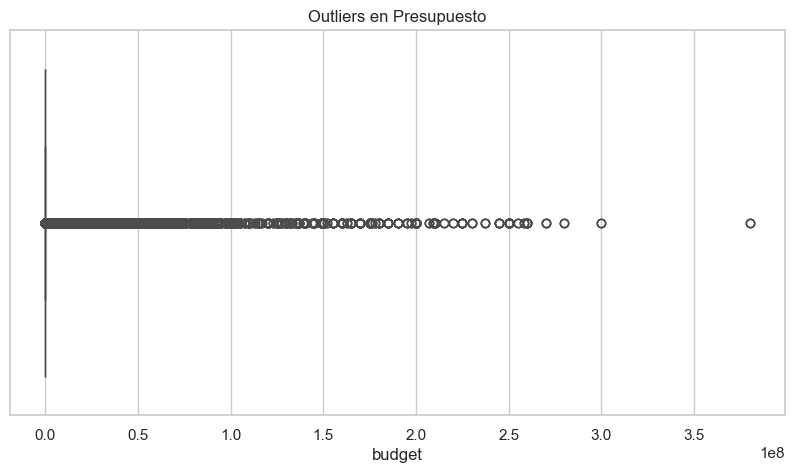

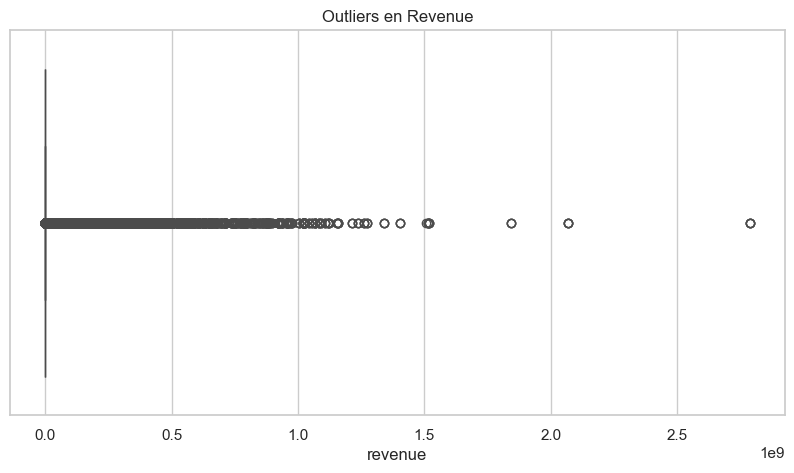

In [29]:
# Boxplot para detectar outliers en 'budget'
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['budget'])
plt.title("Outliers en Presupuesto")
plt.show()

# Puedes repetir para otras columnas relevantes, como 'revenue' y 'runtime'
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['revenue'])
plt.title("Outliers en Revenue")
plt.show()


 Los outliers identificados reflejan la variabilidad de la industria cinematográfica, donde unas pocas producciones alcanzan presupuestos e ingresos extraordinarios, mientras que la mayoría permanece en un rango mucho más bajo.

8. Análisis de Variables Categóricas

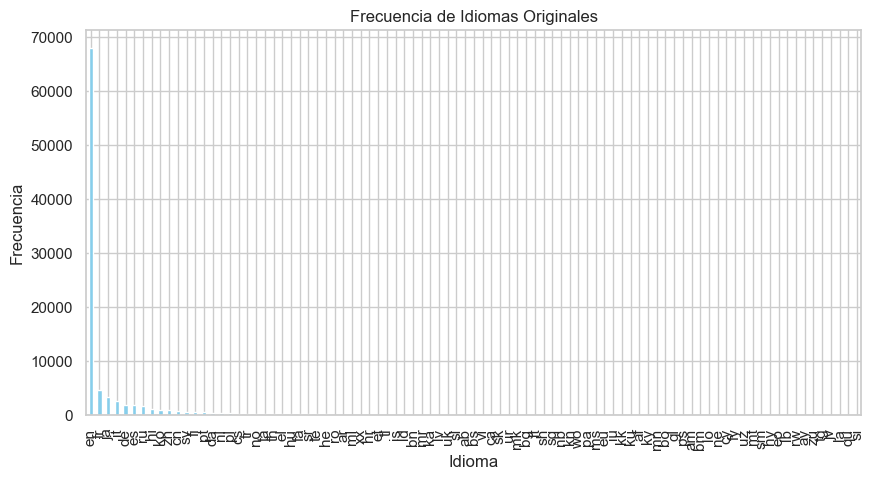

In [30]:
# Gráfico de barras de la variable 'original_language'
plt.figure(figsize=(10, 5))
data['original_language'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Frecuencia de Idiomas Originales")
plt.xlabel("Idioma")
plt.ylabel("Frecuencia")
plt.show()

# Puedes hacer gráficos similares para otras variables categóricas, como 'status' o 'country_name'


Este gráfico destaca cómo el cine internacional  está dominado por el idioma Inglés,

9. Nube de Palabras: Títulos y Descripciones

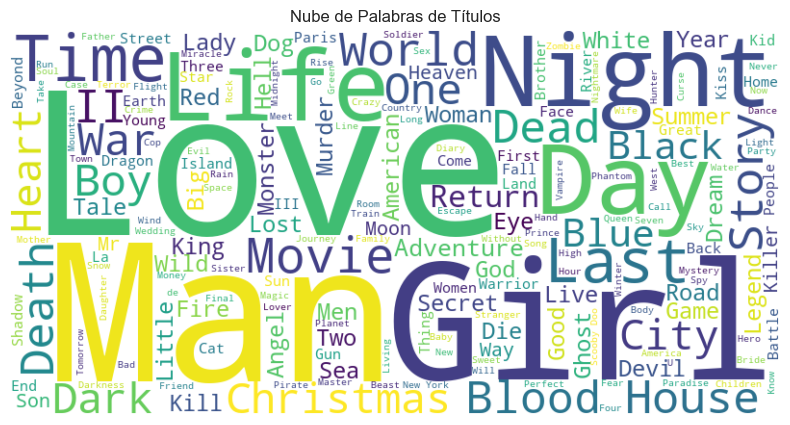

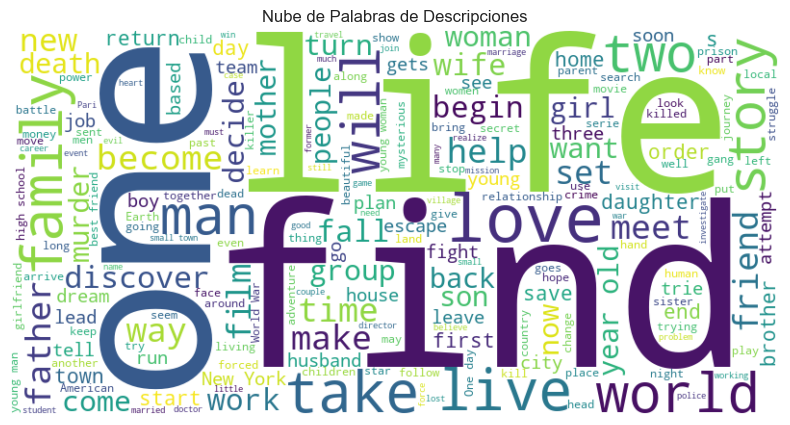

In [31]:
# Nube de palabras para la columna 'title'
text = " ".join(title for title in data['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras de Títulos")
plt.show()

# Nube de palabras para 'overview' si deseas analizar las descripciones
text_overview = " ".join(overview for overview in data['overview'].dropna())
wordcloud_overview = WordCloud(width=800, height=400, background_color="white").generate(text_overview)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_overview, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras de Descripciones")
plt.show()


Análisis de la Nube de Palabras :

Para el análisis de títulos y descripciones, generé dos nubes de palabras que revelan términos clave y temas frecuentes en ambos contextos.

Nube de Palabras de Títulos:

Palabras como "Love," "Man," "Girl," "Day," "Night," "Life," y "War" son prominentes. Esto sugiere que muchas películas se centran en temas de amor, vida, y conflicto. También se observan términos que reflejan emociones o etapas importantes en la vida, como "Death," "Blood," "Christmas," "World," y "Adventure".
La variedad de palabras sugiere que los títulos a menudo usan temas universales y significativos para atraer a la audiencia, y se puede inferir que la popularidad de ciertos temas podría indicar géneros o enfoques narrativos específicos (romance, acción, aventuras, etc.).
Nube de Palabras de Descripciones:

En las descripciones, destacan palabras como "find," "life," "love," "man," "help," "friend," y "family". Esto indica un enfoque narrativo en la búsqueda (de amor, sentido, o relaciones) y en la resolución de problemas o desafíos, lo cual es típico en muchas tramas cinematográficas.
La presencia de términos como "become," "decide," "live," y "make" sugiere que las películas frecuentemente tratan sobre decisiones y cambios en la vida de los personajes. Esto podría reflejar historias de transformación personal o aventuras donde los personajes evolucionan significativamente.
Interpretación General: La comparación entre ambas nubes de palabras muestra consistencia en los temas, con "love" y "life" como elementos centrales tanto en títulos como en descripciones. La diferencia es que los títulos suelen ser más abstractos o simbólicos, mientras que las descripciones profundizan en la narrativa y el conflicto. Este análisis ayuda a entender las tendencias temáticas en el dataset y puede ser valioso para ajustar el sistema de recomendación, enfocando en términos populares y temáticas que probablemente sean de interés para la audiencia.

10. Conclusiones 

Conclusiones del EDA 
El análisis exploratorio de datos (EDA) nos permitió identificar varias características clave en el dataset de películas, lo cual influenció directamente en el diseño y configuración del sistema de recomendación. A continuación, se detallan los hallazgos principales y cómo estos motivaron las decisiones en la implementación del sistema de recomendación:

- Correlaciones y Distribuciones:

Observamos una correlación significativa entre el budget y el revenue, lo cual es intuitivo, ya que producciones con mayor inversión tienden a tener mayores ingresos. También, revenue mostró una fuerte correlación con vote_count, lo que indica que películas más populares (con más votos) tienden a generar más ingresos.
Las distribuciones de variables como budget, revenue, popularity, y vote_count están sesgadas hacia la izquierda, sugiriendo una alta concentración de películas de bajo presupuesto y popularidad limitada. Este sesgo también se refleja en el campo return, que mostró valores elevados para pocas películas, mientras que la mayoría se situaba en un rango bajo. Esto sugiere una gran cantidad de películas de bajo rendimiento comercial.
- Outliers:

En las variables budget y revenue se detectaron valores atípicos significativos, especialmente en películas con presupuestos extremadamente altos o ingresos anormalmente elevados. Aunque estos valores extremos no necesariamente indican errores, pueden influir en los cálculos de similitud si no se normalizan adecuadamente.
- Patrones Temáticos en Títulos y Descripciones:

La nube de palabras reveló que temas relacionados con "amor", "vida", "muerte" y "aventuras" son recurrentes en los títulos y descripciones, lo cual sugiere que estas temáticas son populares y pueden atraer a diferentes segmentos de audiencia. Este hallazgo respaldó la decisión de incluir la descripción (overview) como una característica clave en el sistema de recomendación, ya que capturar el contenido temático de las películas puede mejorar la precisión de las recomendaciones.
- Valores Nulos y Decisiones de Manejo:

El análisis de valores nulos mostró que ciertas columnas, como tagline y collection_name, tienen una gran cantidad de valores faltantes. Decidí no usarlas en el sistema de recomendación, ya que podrían introducir ruido y no agregarían un valor significativo al modelo. Para columnas como overview, donde también había nulos, completé estos valores con cadenas vacías para evitar problemas al procesar el texto.
Las columnas budget y revenue, que presentaban valores nulos o cero en algunos casos, fueron normalizadas para que la escala no afecte negativamente la similitud entre películas.

- Justificación del Sistema de Recomendación
Dado el análisis anterior, implementé el sistema de recomendación considerando tres grupos de características clave:

Descripción de la Película (Text Mining con TF-IDF):

Las descripciones (overview) representan el tema y el contenido narrativo de la película, y al aplicar la vectorización TF-IDF, logré capturar la frecuencia y relevancia de palabras importantes en cada descripción. Esto permite al sistema de recomendación sugerir películas temáticamente similares en términos de historia y contenido.

- Géneros (One-Hot Encoding):

Al transformar los géneros (genres_name) mediante un One-Hot Encoding, el sistema puede reconocer similitudes en géneros entre películas. Esta característica es importante para ofrecer recomendaciones que respeten los géneros que el usuario prefiere. Por ejemplo, si busca una comedia, es probable que reciba recomendaciones de películas de géneros similares.
Características Numéricas (Normalización):

Variables como popularity, vote_average y release_year fueron normalizadas y añadidas al modelo. La normalización garantiza que estas variables tengan un peso equilibrado al calcular la similitud, evitando que valores extremos influyan en exceso. Estas variables ayudan a afinar las recomendaciones, ya que la popularidad y la calificación pueden ser indicadores de calidad o de éxito en audiencias similares.
Resumen
Este sistema de recomendación basado en una combinación de características textuales, categóricas y numéricas ofrece una aproximación equilibrada entre la similitud temática, de género y de popularidad. Al integrar estos elementos, el sistema no solo recomienda películas similares en historia, sino también en su estilo y atractivo general. Esta decisión está orientada a mejorar la experiencia del usuario y a ofrecer recomendaciones más precisas, adaptadas tanto al contenido como a las características generales de las películas.